## **📌 Problem Overview:**
A company produces two products (A and B) at two factories (Factory 1 & Factory 2). The goal is to **minimize production costs** while ensuring demand is met and capacity constraints are not exceeded.

**Decision Variables:**

We need to determine:

-> How many units of Product A to produce at Factory 1 (x_A1) and Factory 2 (x_A2).

-> How many units of Product B to produce at Factory 1 (x_B1) and Factory 2 (x_B2).

### Importing Libraries

In [1]:
import pulp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Define the Problem

In [2]:
problem = pulp.LpProblem("Supply_Chain_Optimization", pulp.LpMinimize)

This creates an optimization problem called **"Supply_Chain_Optimization"**.
We specify minimization (pulp.LpMinimize) because we want to minimize production costs.

###  Define Decision Variables

In [3]:
x_A1 = pulp.LpVariable("Product A Factory1", lowBound=0, cat='Integer')
x_A2 = pulp.LpVariable("Product A Factory2", lowBound=0, cat='Integer')
x_B1 = pulp.LpVariable("Product B Factory1", lowBound=0, cat='Integer')
x_B2 = pulp.LpVariable("Product B Factory2", lowBound=0, cat='Integer')

Decision variables represent the number of units produced at each factory.
lowBound=0 ensures that we cannot produce negative quantities.
cat='Continuous' means we allow fractional values (though normally, production might be in whole numbers).

### Define Costs

In [4]:
cost_A1 = 20   
cost_A2 = 25   
cost_B1 = 30   
cost_B2 = 28   

### Define Objective Function (Minimize Cost)

In [5]:
problem += (cost_A1 * x_A1 + cost_A2 * x_A2 + cost_B1 * x_B1 + cost_B2 * x_B2), "Total_Cost"

This executes the linear programming model and finds the optimal values for x_A1, x_A2, x_B1, and x_B2

### Define Constraints

In [6]:
problem += x_A1 + x_A2 >= 200, "Demand Constraint Product A"
problem += x_B1 + x_B2 >= 150, "Demand Constraint Product B"

problem += x_A1 + x_B1 <= 250, "Factory1 Capacity"
problem += x_A2 + x_B2 <= 300, "Factory2 Capacity"

problem += x_A1 <= 180, "Max Production Product A Factory1"
problem += x_B2 <= 200, "Max Production Product B Factory2"

problem += x_A1 + x_B1 >= 100, "Minimum Production Factory1"
problem += x_A2 + x_B2 >= 120, "Minimum Production Factory2"

problem += 2 * x_A1 + 3 * x_B1 <= 400, "Raw Material Limit Factory1"
problem += 3 * x_A2 + 2 * x_B2 <= 500, "Raw Material Limit Factory2"

problem += x_A1 + x_A2 <= 250, "Total Production Limit Product A"
problem += x_B1 + x_B2 <= 200, "Total Production Limit Product B"

In [7]:
problem.solve()

1

In [8]:
print(f"Optimal Production at Factory 1 (Product A): {x_A1.varValue}")
print(f"Optimal Production at Factory 2 (Product A): {x_A2.varValue}")
print(f"Optimal Production at Factory 1 (Product B): {x_B1.varValue}")
print(f"Optimal Production at Factory 2 (Product B): {x_B2.varValue}")
print(f"Minimum Total Cost: {pulp.value(problem.objective)}")

Optimal Production at Factory 1 (Product A): 180.0
Optimal Production at Factory 2 (Product A): 20.0
Optimal Production at Factory 1 (Product B): 0.0
Optimal Production at Factory 2 (Product B): 150.0
Minimum Total Cost: 8300.0


### Visualization

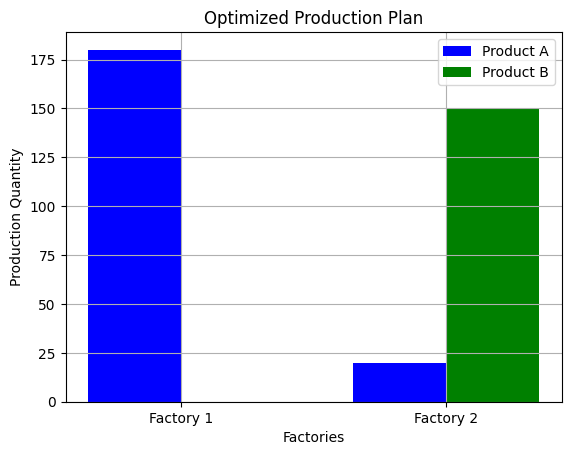

In [9]:
factories = ["Factory 1", "Factory 2"]
prod_A = [x_A1.varValue, x_A2.varValue]
prod_B = [x_B1.varValue, x_B2.varValue]

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(factories))
bar1 = plt.bar(index, prod_A, bar_width, label="Product A", color='b')
bar2 = plt.bar(index + bar_width, prod_B, bar_width, label="Product B", color='g')

plt.xlabel("Factories")
plt.ylabel("Production Quantity")
plt.title("Optimized Production Plan")
plt.xticks(index + bar_width / 2, factories)
plt.legend()
plt.grid()
plt.show()